# Problem Statement
The owner of the City Hotel and Resort Hotel has recently seen significant cancellation rates. Many rooms are unoccupied due to a lack of guests, which is harming my client's business.

In this project, I've analysed the cancellation rate of two hotel bookings and provided relevant insights, such as graphs and suggestions, so that my client could make the best and most appropriate decision.

The primary themes that I've analysed are hotel booking cancellations as well as other elements that do not have an impact on their business or yearly income generation.


# Steps followed:
I've used the hotel-booking dataset, which I found on Kaggle.
I've explored and cleaned the data.\
I've analysed the data and drawn useful insights.\
Finally, presented these data by showing graphs for a better understanding. I'm giving my opinion and suggestions on how booking cancellations can be reduced as a result of generating more revenue.

# Assumption Taken:
No unexpected occurrences will have a major impact on the data.\
The owner has not already implemented my suggested opinion.\
The major reason that the owner is not able to make sufficient profit is booking cancellations.

# Reseach Question:
1. What factors influence hotel reservation cancellations?
2. How can we improve hotel reservation cancellations?
3. How will hotels be helped with pricing and promotion decisions?
4. What's the percentage of customers that rebooks?

# Hypothesis:
Cancellations happen when prices rise.\
Customers likely to cancel when confirmation takes too long.\
The clients make their arrangements through in-person travel agents.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
df = pd.read_csv('hotel_booking.csv')

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
df = df.drop(['name','email','phone-number','credit_card'], axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [18]:
for col in df.describe(include = 'object'):
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [21]:
df.drop(['agent','company'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [24]:
df['is_repeated_guest'].sum()

3806

In [26]:
df.shape

(118898, 30)

## Percentage of repeated customers

As we can see the percentage of repeated customers above all the booking is around 3 percent which is low, so we should furthur scrutinize this ascept to know the reason for this. Possible reasons may include: Bad staff behaviour, lack of cleanliness or poor service.

In [28]:
percentage_repeated_customers = (df['is_repeated_guest'].sum()/df.shape[0])*100
percentage_repeated_customers

3.201063096099178

In [29]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

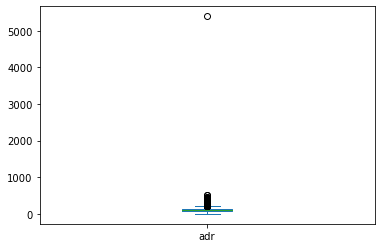

In [33]:
df['adr'].plot(kind = 'box')

As we can see there is a outlier in column adr (i.e. average daily rate) which can be caused by typo while entering information, so before proceeding in analysis its wise to remove outliers which can skew our analysis.

In [34]:
df = df[df['adr'] < 5000]

In [36]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## Data Analysis and Visualization

### Calculating Percantage of Cancellation

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


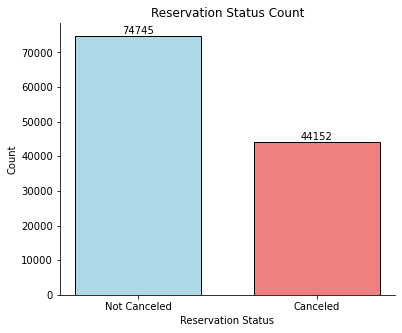

In [38]:
cancelled_perc = df["is_canceled"].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (6,5))

colors = ['lightblue', 'lightcoral']

# Define the x-axis labels
x_labels = ["Not Canceled", "Canceled"]

# Get the count of each reservation status
status_count = df["is_canceled"].value_counts()

# Create the bar plot with customized parameters
plt.bar(x_labels, status_count, edgecolor="k", color=colors, width=0.7)

# Set the title and axes labels
plt.title("Reservation Status Count")
plt.xlabel("Reservation Status")
plt.ylabel("Count")

# Add data labels on top of the bars
for i, count in enumerate(status_count):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

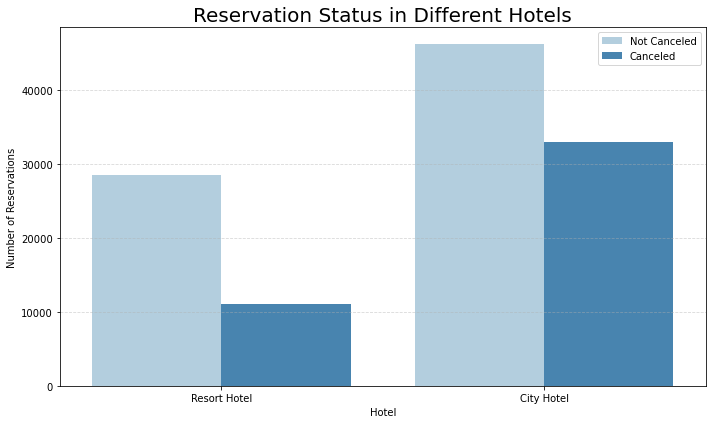

In [40]:
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Create the count plot
ax1 = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="Blues")

# Set legend labels and position
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Not Canceled", "Canceled"], loc="upper right")

plt.title("Reservation Status in Different Hotels", size=20)
plt.xlabel("Hotel")
plt.ylabel("Number of Reservations")

# Rotate x-axis labels for better readability (if needed)
# plt.xticks(rotation=45)

# Add gridlines
plt.grid(True, axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()  # Adjust the spacing between subplots, if any

plt.show()

In [41]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [42]:
city_hotel = df[df["hotel"] == "City Hotel"]
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [43]:
resort_hotel = resort_hotel.groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel.groupby("reservation_status_date")[["adr"]].mean()

## Plotting avg daily rate for both city hotel and resort hotel

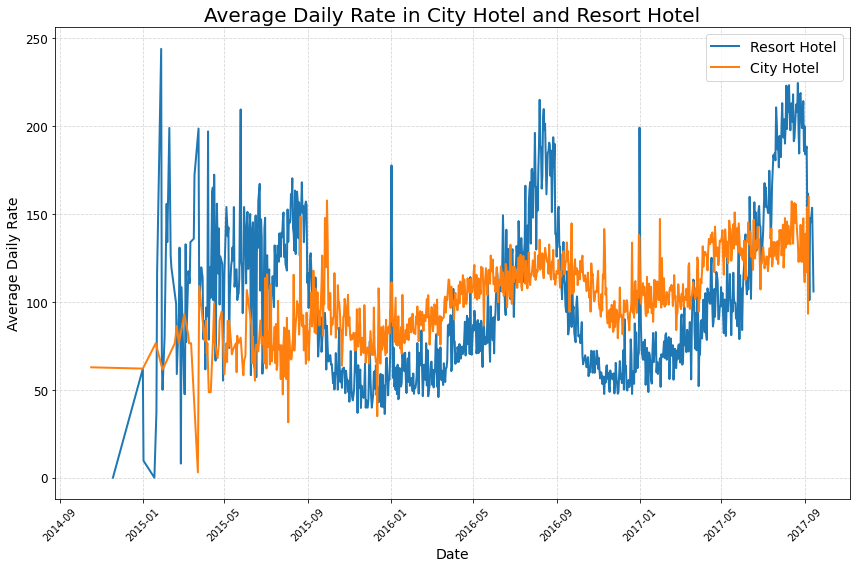

In [44]:
plt.figure(figsize=(12, 8))

# Plot data
plt.plot(resort_hotel.index, resort_hotel["adr"], label="Resort Hotel", linewidth=2)
plt.plot(city_hotel.index, city_hotel["adr"], label="City Hotel", linewidth=2)

# Set title and axis labels
plt.title("Average Daily Rate in City Hotel and Resort Hotel", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Daily Rate", fontsize=14)

# Customize tick labels
plt.xticks(rotation=45)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend(fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

## Visualizing Reservation status each month

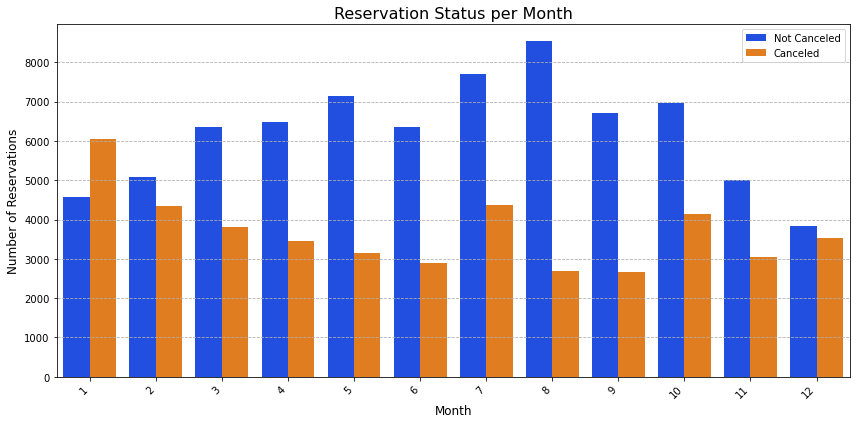

In [45]:
df["month"] = df["reservation_status_date"].dt.month
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(x="month", hue="is_canceled", data=df, palette="bright")
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title("Reservation Status per Month", size=16)
plt.xlabel("Month", size=12)
plt.ylabel("Number of Reservations", size=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.legend(["Not Canceled", "Canceled"], loc='upper right')
plt.show()

## This chart confirms the hypothesis that higher the adr more the cancellation of reservations 

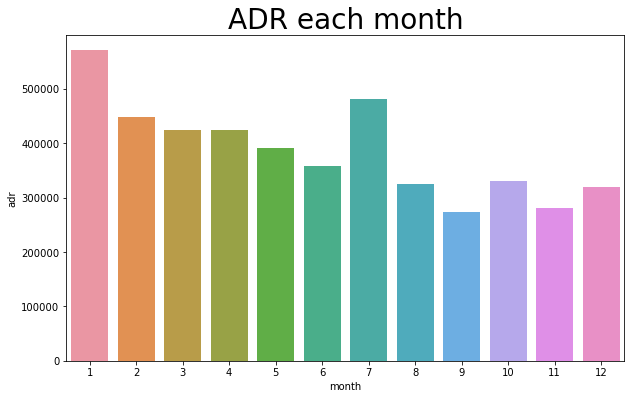

In [51]:
plt.figure(figsize = (10,6))
plt.title('ADR each month', fontsize = 28)
sns.barplot('month', 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

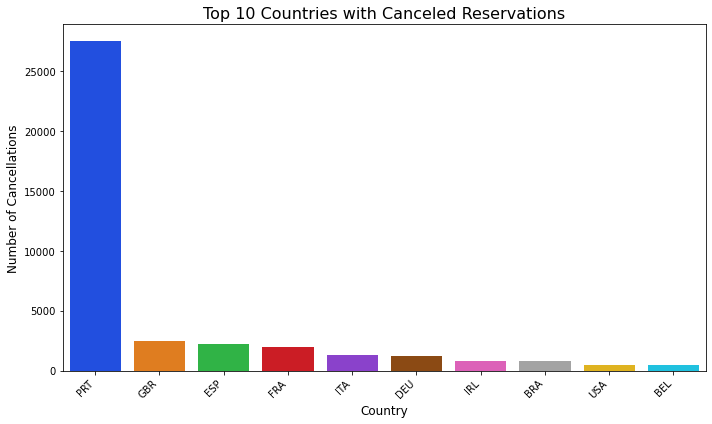

In [52]:
cancelled_data = df[df["is_canceled"] == 1]
top_10_country = cancelled_data["country"].value_counts()[:10]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_country.index, y=top_10_country, palette="bright")
plt.title("Top 10 Countries with Canceled Reservations", size=16)
plt.xlabel("Country", size=12)
plt.ylabel("Number of Cancellations", size=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In the countries above the company should see what's going so wrong. Is it property itself that might need restoration or they should market it better? Company should launch campign and provide some offers to attract consumers.

In [53]:
cancelled_data['market_segment'].value_counts (normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

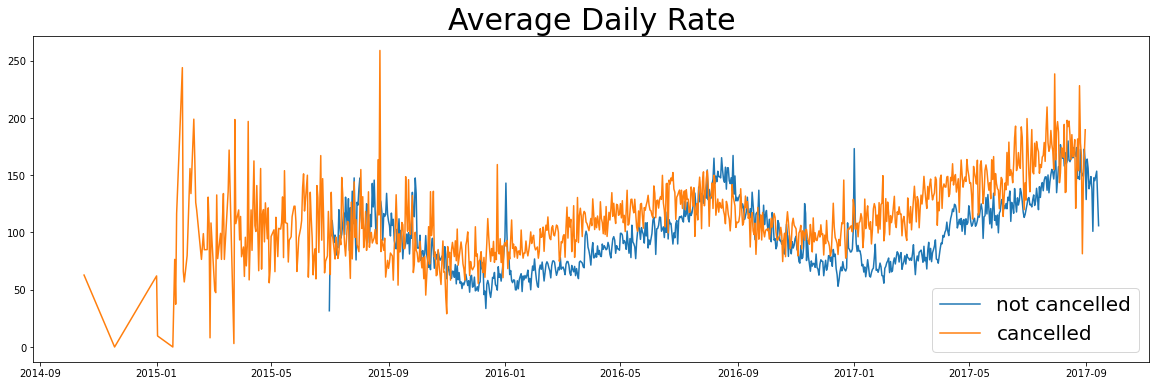

In [57]:
cancelled_df_adr = cancelled_data.groupby( 'reservation_status_date') [['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby( 'reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize= 30)
plt.plot(not_cancelled_df_adr[ 'reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)